Task: Predicting the fare maount for a taxi ride in new york city using machine learning techniques.

In [1]:
import numpy as np 
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor


import os

In [2]:
    #loading the training and testing data
train = pd.read_csv("train.csv",nrows=10000)
test = pd.read_csv("test.csv",nrows=10000)

    Data cleaning and Exploratory data analysis

In [3]:
train.shape

(10000, 8)

In [4]:
test.shape

(9914, 7)

In [5]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [6]:
test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [7]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.235464,-72.466660,39.920448,-72.474094,39.893281,1.644700
std,9.584258,10.609729,7.318932,10.579732,6.339919,1.271229
min,-2.900000,-74.438233,-74.006893,-74.429332,-73.994392,0.000000
25%,6.000000,-73.992058,40.734547,-73.991112,40.735230,1.000000
50%,8.500000,-73.981758,40.752693,-73.980083,40.753738,1.000000
75%,12.500000,-73.966925,40.767694,-73.963504,40.768186,2.000000
max,180.000000,40.766125,401.083332,40.802437,41.366138,6.000000


Checking for missing values. 

In [8]:
train.isnull().sum().sort_values(ascending=False)

passenger_count      0
dropoff_latitude     0
dropoff_longitude    0
pickup_latitude      0
pickup_longitude     0
pickup_datetime      0
fare_amount          0
key                  0
dtype: int64

In [9]:
test.isnull().sum().sort_values(ascending = False)

passenger_count      0
dropoff_latitude     0
dropoff_longitude    0
pickup_latitude      0
pickup_longitude     0
pickup_datetime      0
key                  0
dtype: int64

As the training data set has huge volume, we can drop the null rows, missing values from the dataset.

In [10]:
train = train.drop(train[train.isnull().any(1)].index, axis = 0)

In [11]:
#checking shape agin as we dropped some rows.
train.shape

(10000, 8)

In [12]:
# TARGET COLUMN ANALYSIS
# AS NEGATIVE FARE VALUES ARE NOT POOSIBLE IN REALITY WE HAVE TO DROP THOSE COLUMNS.
train['fare_amount'].describe()


count    10000.000000
mean        11.235464
std          9.584258
min         -2.900000
25%          6.000000
50%          8.500000
75%         12.500000
max        180.000000
Name: fare_amount, dtype: float64

In [13]:
#Counting negative amount records
from collections import Counter
Counter(train['fare_amount'] < 0)

Counter({False: 9998, True: 2})

In [14]:
#dropping negative fare amount records
train = train.drop(train[train['fare_amount'] < 0].index, axis = 0)

#print the shape of the trainin dataset
train.shape

(9998, 8)

In [15]:
#again check for any negaitve record values

train['fare_amount'].describe()

count    9998.000000
mean       11.238252
std         9.583189
min         0.010000
25%         6.000000
50%         8.500000
75%        12.500000
max       180.000000
Name: fare_amount, dtype: float64

In [16]:
train['fare_amount'].sort_values(ascending = False)


1335    180.00
1483    165.00
6630    128.83
7810     95.00
9431     88.00
         ...  
8916      2.50
7728      2.50
472       2.50
8596      2.50
2780      0.01
Name: fare_amount, Length: 9998, dtype: float64

#FEATURE ANALYSIS

In [17]:
train['passenger_count'].describe()

count    9998.000000
mean        1.644829
std         1.271324
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         6.000000
Name: passenger_count, dtype: float64

#AS WE CAN SEE A TAXI CANNOT AFFORD PASSEGER COUNT OF 208. 
# WE SHALL COUNT PASSENGER COUNT  > 6 AND REMOVE  THOSE RECORDS FROM THE DATSET.

In [18]:
train[train['passenger_count'] > 6].count()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [19]:
#DROPPING THE OUTLIER RECORD
train.drop(train[train['passenger_count'] == 208].index, axis = 0,inplace = True)


In [20]:
train['passenger_count'].describe()


count    9998.000000
mean        1.644829
std         1.271324
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         6.000000
Name: passenger_count, dtype: float64

In [21]:
#EXAMINING ALL THE ATTRIBUTES ONE BY ONE
# pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude.

train['pickup_latitude'].describe()

count    9998.000000
mean       39.920296
std         7.319656
min       -74.006893
25%        40.734564
50%        40.752695
75%        40.767696
max       401.083332
Name: pickup_latitude, dtype: float64

In [22]:
#AS WE CANNOT HAVE NEGATIVE LATITUDES, REMOVE THOSE RECORDS.
#COUNTING NUMBE ROF LATITUDE RECORDS WHICH ARE LESS THAN 90
len(train[train['pickup_latitude'] < -90 ])


0

In [23]:
train.drop(train[train['pickup_latitude'] < -90].index, axis = 0, inplace = True)


In [24]:
train.shape


(9998, 8)

In [25]:
#count the number of records which has latitude > 90
len(train[train['pickup_latitude'] > 90 ])

1

In [26]:
# we can see only 9 records has latitude more than 90.
#drop these records from the training set.
train.drop(train[train['pickup_latitude'] > 90].index, axis = 0, inplace = True)

In [27]:
train.shape

(9997, 8)

In [28]:
#describe the pickup longitude
train['pickup_longitude'].describe()

count    9997.000000
mean      -72.466227
std        10.611292
min       -74.438233
25%       -73.992057
50%       -73.981762
75%       -73.966957
max        40.766125
Name: pickup_longitude, dtype: float64

In [29]:
#there are some records with unrealistic longitude. lets find out and drop those records.
#count the records which has longitue less than -180.
len(train[train['pickup_longitude'] < -180])

0

In [30]:

#drop the records with longitude less than -180
train.drop(train[train['pickup_longitude'] < -180].index, axis = 0, inplace = True)

In [31]:
train.shape

(9997, 8)

In [32]:
#count the records with longitude more than 180.
len(train[train['pickup_longitude'] > 180])

0

In [33]:
train.drop(((train[train['dropoff_latitude'] < -90])).index, axis=0,inplace= True)

In [34]:
train.drop(((train[train['dropoff_latitude'] > 90])).index, axis=0,inplace= True)

In [35]:
train.shape

(9997, 8)

In [36]:
#dropoff the unrealistic records for dropoff longitude column
train.drop(((train[train['dropoff_longitude'] < -180])).index,axis = 0, inplace = True)

In [37]:
#dropoff the unrealistic records for dropoff longitude column
train.drop(((train[train['dropoff_longitude'] >180])).index,axis = 0, inplace = True)

In [38]:
train.shape

(9997, 8)

In [39]:
#check the data types of all the columns
train.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [40]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


#AS WE CAN SEE DATETIME SHOULD BE IN DATE FORMAT RATHER THAN OBJECT FORMAT.

In [41]:
# CONVERTING OBJECT TO DATETIME FOR TRAINING DATASET.
train['key'] = pd.to_datetime(train['key'])
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])

In [42]:
train.dtypes

key                       datetime64[ns]
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [43]:
#convertin the object type into datetime for test dataset
test['key'] = pd.to_datetime(test['key'])
test['pickup_datetime'] = pd.to_datetime(test['pickup_datetime'])

In [44]:
test.dtypes

key                       datetime64[ns]
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

#eda
cONVERT LATITIUDE AND LONGITUTES INTO NUMERICAL DATA
Distance

Calculate the distance based on longitude and latitude

Haversine formula:

dlon = lon2 - lon1 dlat = lat2 - lat1 a = (sin(dlat/2))^2 + cos(lat1) cos(lat2) (sin(dlon/2))^2 c = 2 atan2( sqrt(a), sqrt(1-a) ) d = R c (where R is the radius of the Earth)

a = sin²(Δφ/2) + cos φ1 ⋅ cos φ2 ⋅ sin²(Δλ/2)
c = 2 ⋅ atan2( √a, √(1−a) )¶
d = R ⋅ c

In [45]:

#define a function to calculate the distance
def haversine_distance(pickup_latitude,pickup_longitude,drop_latitude,drop_longitude):
    
    """
    
    inputs:
    pickup_latitude - latitude coordinate of where the taxi ride started.
    pickup_longitude - longitude coordinate of where the taxi ride started.
    drop_latitude - latitude coordinate of where the taxi ride ended.
    drop_longitude - longitude coordinate of where the taxi ride ended.
    
    output: this function will return the haversine distance.
    
    """
    
    data = [train,test]
    
    for i in data:
        R = 6371 # radius of the erth in kilometers
        phi1 = np.radians(i[pickup_latitude])
        phi2 = np.radians(i[drop_latitude])
        
        delta_phi = np.radians(i[drop_latitude] - i[pickup_latitude])
        delta_lambda = np.radians(i[drop_longitude] - i[pickup_longitude])
        
        a = np.sin(delta_phi / 2.0) **2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
        
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
        
        d = R * c
        
        i['harvesine_distance'] = d
        
    return d

In [46]:

haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

0        2.323260
1        2.425353
2        0.618628
3        1.961033
4        5.387301
          ...    
9909     2.124874
9910     3.270969
9911    19.183941
9912     8.343486
9913     1.180825
Length: 9914, dtype: float64

In [47]:
train['harvesine_distance'].head()

0    1.030764
1    8.450134
2    1.389525
3    2.799270
4    1.999157
Name: harvesine_distance, dtype: float64

In [48]:
test['harvesine_distance'].head()

0    2.323260
1    2.425353
2    0.618628
3    1.961033
4    5.387301
Name: harvesine_distance, dtype: float64

In [49]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,harvesine_distance
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


In [50]:
test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,harvesine_distance
0,2015-01-27 13:08:24.000000200,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,2.323260
1,2015-01-27 13:08:24.000000300,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,2.425353
2,2011-10-08 11:53:44.000000200,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1,0.618628
3,2012-12-01 21:12:12.000000200,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1,1.961033
4,2012-12-01 21:12:12.000000300,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1,5.387301


In [51]:
#as we cannot filter out form the date format we need to create additional columns to read the data in simple way.
data = [train,test]
for i in data:
    i['year'] = i['pickup_datetime'].dt.year
    i['month'] = i['pickup_datetime'].dt.month
    i['date'] = i['pickup_datetime'].dt.day
    i['day_of_month'] = i['pickup_datetime'].dt.dayofweek
    i['hour'] = i['pickup_datetime'].dt.hour

In [52]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,harvesine_distance,year,month,date,day_of_month,hour
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,2009,6,15,0,17
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,2010,1,5,1,16
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,2011,8,18,3,0
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,2012,4,21,5,4
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,2010,3,9,1,7


Text(0, 0.5, 'Frequency')

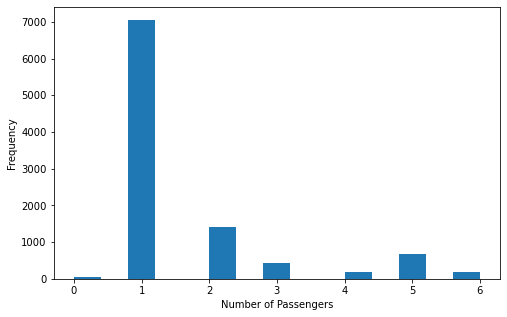

In [53]:
#we need to check that how number of passengers affect the fare
plt.figure(figsize= (8,5))
plt.hist(train['passenger_count'],bins = 15)
plt.xlabel('Number of Passengers')
plt.ylabel('Frequency')

By seeing the above graphs we can see that single passengers are the frequnt tranvellers. Maximum fare is also generated from the single passenger.

Text(0, 0.5, 'Fare')

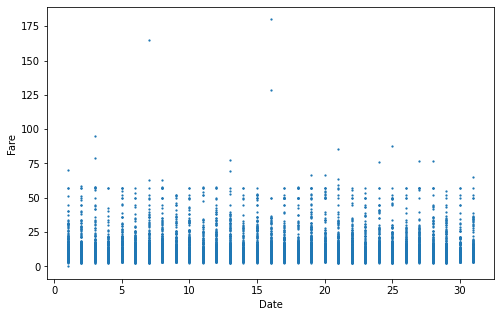

In [54]:
#Does te date and time of pickup affect the fare?

plt.figure(figsize = (8,5))
plt.scatter(x=train['date'],y = train['fare_amount'],s = 1.5)
plt.xlabel('Date')
plt.ylabel('Fare')

Text(0, 0.5, 'Fare')

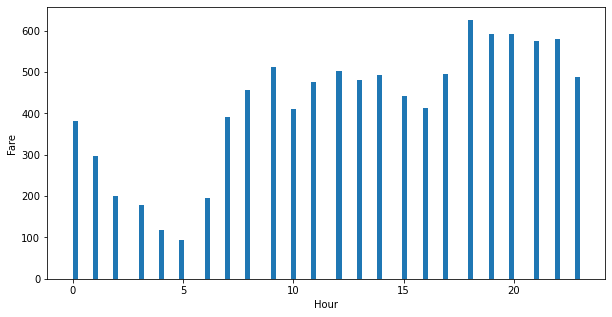

In [55]:
plt.figure(figsize = (10,5))
plt.hist(train['hour'], bins= 100)
plt.xlabel('Hour')
plt.ylabel('Fare')

Text(0, 0.5, 'Fare Amount')

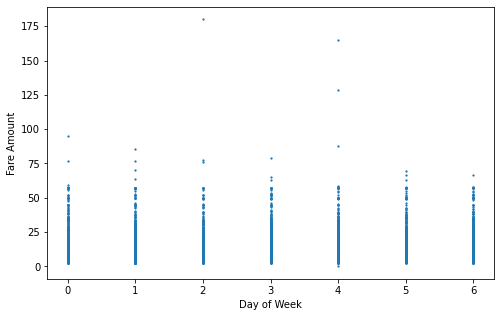

In [56]:
#Check whether any day of week affect the fare
plt.figure(figsize = (8,5))
plt.scatter(x = train['day_of_month'], y= train['fare_amount'], s= 1.5)
plt.xlabel('Day of Week')
plt.ylabel('Fare Amount')

Text(0, 0.5, 'Fare Amount')

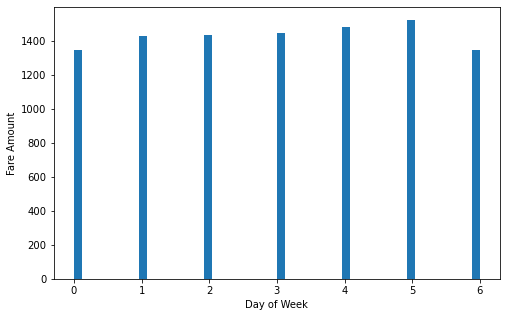

In [57]:
plt.figure(figsize = (8,5))
plt.hist(train['day_of_month'],bins= 50)
plt.xlabel('Day of Week')
plt.ylabel('Fare Amount')

By seeing the plots for day of week we can clearly observe the highest fare is earned on Sunday and Monday.

#Binning 
#Binning
#Converting to numerical age from categorical variable

In [58]:
bins_0 = train.loc[(train['harvesine_distance'] == 0), ['harvesine_distance']]
bins_1 = train.loc[(train['harvesine_distance'] > 0) & (train['harvesine_distance'] <= 10),['harvesine_distance']]
bins_2 = train.loc[(train['harvesine_distance'] > 10) & (train['harvesine_distance'] <= 50),['harvesine_distance']]
bins_3 = train.loc[(train['harvesine_distance'] > 50) & (train['harvesine_distance'] <= 100),['harvesine_distance']]
bins_4 = train.loc[(train['harvesine_distance'] > 100) & (train['harvesine_distance'] <= 200),['harvesine_distance']]
bins_5 = train.loc[(train['harvesine_distance'] > 200) & (train['harvesine_distance'] <= 300),['harvesine_distance']]
bins_6 = train.loc[(train['harvesine_distance'] > 300),['harvesine_distance']]
bins_0['bins'] = '0'
bins_1['bins'] = '0-10'
bins_2['bins'] = '11-50'
bins_3['bins'] = '51-100'
bins_4['bins'] = '100-200'
bins_5['bins'] = '201-300'
bins_6['bins'] = '>300'
dist_bins =pd.concat([bins_0,bins_1,bins_2,bins_3,bins_4,bins_5,bins_6])
#len(dist_bins)
dist_bins.columns

Index(['harvesine_distance', 'bins'], dtype='object')

In [59]:
dist_bins.head()

,harvesine_distance,bins
11,0.0,0
15,0.0,0
26,0.0,0
105,0.0,0
124,0.0,0


In [60]:
dist_bins['bins'].value_counts()

0-10       9198
11-50       501
0           279
>300         12
51-100        6
100-200       1
Name: bins, dtype: int64

In [61]:
#check for the records where latitiude and longitude values are 0
train.loc[((train['pickup_latitude'] == 0) & (train['pickup_longitude'] == 0)) & ((train['dropoff_latitude'] !=0) & (train['dropoff_longitude'] !=0)) & (train['fare_amount']== 0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,harvesine_distance,year,month,date,day_of_month,hour


In [62]:
# drop records which has pickup latitude and longitude = 0 and fare =0
train.drop(train.loc[((train['pickup_latitude'] == 0) & (train['pickup_longitude'] == 0)) & ((train['dropoff_latitude'] !=0) & (train['dropoff_longitude'] !=0)) & (train['fare_amount']== 0)].index, axis = 0, inplace = True)

In [63]:
train.shape

(9997, 14)

In [64]:
#Check again in test data
test.loc[((test['pickup_latitude']==0) & (test['pickup_longitude']==0))&((test['dropoff_latitude']!=0) & (test['dropoff_longitude']!=0))]

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,harvesine_distance,year,month,date,day_of_month,hour


In [65]:
#dropoff latitude and longitude = 0
train.loc[((train['pickup_latitude']!=0) & (train['pickup_longitude']!=0))&((train['dropoff_latitude']==0) & (train['dropoff_longitude']==0)) & (train['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,harvesine_distance,year,month,date,day_of_month,hour


In [66]:
#dropoff latitude and longitude = 0
train.drop(train.loc[((train['pickup_latitude']!=0) & (train['pickup_longitude']!=0))&((train['dropoff_latitude']==0) & (train['dropoff_longitude']==0)) & (train['fare_amount']==0)].index, axis=0, inplace = True)

In [67]:
#Checking test data
#Again no records! AWESOME!
test.loc[((test['pickup_latitude']!=0) & (test['pickup_longitude']!=0))&((test['dropoff_latitude']==0) & (test['dropoff_longitude']==0))]

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,harvesine_distance,year,month,date,day_of_month,hour


Let's check the harvesine_distance fields which are greater than 200 kms cause there is no way that people would travel more than 200 kms at the most in NYC in a CAB

In [68]:

high_distance = 0
high_distance = train.loc[(train['harvesine_distance']>200)&(train['fare_amount']!=0)]
high_distance.shape

(12, 14)

In [69]:
high_distance

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,harvesine_distance,year,month,date,day_of_month,hour
472,2009-02-22 22:48:00.000000130,2.5,2009-02-22 22:48:00+00:00,0.000000,0.000000,-74.005433,40.726685,2,8667.304968,2009,2,22,6,22
1260,2011-03-10 20:25:00.000000490,5.7,2011-03-10 20:25:00+00:00,-73.973907,40.754743,0.000000,0.000000,2,8665.268588,2011,3,10,3,20
2280,2011-08-29 08:24:00.000000107,8.9,2011-08-29 08:24:00+00:00,-73.936667,40.757815,0.000000,40.757815,1,6026.494216,2011,8,29,0,8
2397,2012-06-24 17:11:10.000000100,45.0,2012-06-24 17:11:10+00:00,0.000000,0.000000,-74.010230,40.714553,2,8667.454421,2012,6,24,6,17
4278,2015-04-07 23:33:02.000000500,7.0,2015-04-07 23:33:02+00:00,-73.972702,40.757423,0.000000,0.000000,1,8665.223767,2015,4,7,1,23
4597,2010-03-30 07:12:00.000000158,6.9,2010-03-30 07:12:00+00:00,0.000000,0.000000,-73.989693,40.754280,1,8666.566030,2010,3,30,1,7
5864,2012-03-04 01:35:00.000000173,8.5,2012-03-04 01:35:00+00:00,-73.995030,40.744945,-7.986640,40.729937,1,5420.988959,2012,3,4,6,1
6188,2014-07-28 15:04:00.000000280,15.5,2014-07-28 15:04:00+00:00,0.000000,0.000000,-73.952980,40.786670,5,8664.191488,2014,7,28,0,15
6302,2015-02-27 16:18:58.000000400,16.5,2015-02-27 16:18:58+00:00,0.000000,0.000000,-73.936600,40.796543,1,8663.039123,2015,2,27,4,16
7014,2011-06-18 04:03:00.000000830,4.5,2011-06-18 04:03:00+00:00,-73.988980,40.721697,-74.001073,0.728087,3,4447.086698,2011,6,18,5,4


In [70]:
high_distance[high_distance['harvesine_distance'] == 0].count()

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count       0
harvesine_distance    0
year                  0
month                 0
date                  0
day_of_month          0
hour                  0
dtype: int64

In [71]:
high_distance.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,harvesine_distance,year,month,date,day_of_month,hour
472,2009-02-22 22:48:00.000000130,2.5,2009-02-22 22:48:00+00:00,0.000000,0.000000,-74.005433,40.726685,2,8667.304968,2009,2,22,6,22
1260,2011-03-10 20:25:00.000000490,5.7,2011-03-10 20:25:00+00:00,-73.973907,40.754743,0.000000,0.000000,2,8665.268588,2011,3,10,3,20
2280,2011-08-29 08:24:00.000000107,8.9,2011-08-29 08:24:00+00:00,-73.936667,40.757815,0.000000,40.757815,1,6026.494216,2011,8,29,0,8
2397,2012-06-24 17:11:10.000000100,45.0,2012-06-24 17:11:10+00:00,0.000000,0.000000,-74.010230,40.714553,2,8667.454421,2012,6,24,6,17
4278,2015-04-07 23:33:02.000000500,7.0,2015-04-07 23:33:02+00:00,-73.972702,40.757423,0.000000,0.000000,1,8665.223767,2015,4,7,1,23


In [72]:
train.update(high_distance)

In [73]:
train[train['harvesine_distance'] ==0].count()

key                   279
fare_amount           279
pickup_datetime       279
pickup_longitude      279
pickup_latitude       279
dropoff_longitude     279
dropoff_latitude      279
passenger_count       279
harvesine_distance    279
year                  279
month                 279
date                  279
day_of_month          279
hour                  279
dtype: int64

In [74]:
#Modelling
train.columns



Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'harvesine_distance', 'year', 'month', 'date',
       'day_of_month', 'hour'],
      dtype='object')

In [75]:
test.columns

Index(['key', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'harvesine_distance', 'year', 'month', 'date', 'day_of_month', 'hour'],
      dtype='object')

In [76]:
#dropping some columns which are not considerable
train = train.drop('pickup_datetime',axis = 1)
test = test.drop('pickup_datetime',axis =1)

train = train.drop('key', axis =1)
test = test.drop('key', axis = 1)

In [77]:
y_train = train['fare_amount']
#y_test = test['fare_amount']
X_train = train.drop('fare_amount',axis =1)
X_test = test

In [78]:
X_test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,harvesine_distance,year,month,date,day_of_month,hour
0,-73.973320,40.763805,-73.981430,40.743835,1,2.323260,2015,1,27,1,13
1,-73.986862,40.719383,-73.998886,40.739201,1,2.425353,2015,1,27,1,13
2,-73.982524,40.751260,-73.979654,40.746139,1,0.618628,2011,10,8,5,11
3,-73.981160,40.767807,-73.990448,40.751635,1,1.961033,2012,12,1,5,21
4,-73.966046,40.789775,-73.988565,40.744427,1,5.387301,2012,12,1,5,21


In [79]:
#Using linear regression model
from sklearn import linear_model
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)
slr = linear_model.LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

In [80]:
#as we have modeled, lets use root mean square error to find the accuracy of the above model.

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

y_train_err = mean_squared_error(y_train, y_train_pred)

print('Mean Sqaured Error for Training data is : ',(y_train_err))

Mean Sqaured Error for Training data is :  90.44348992397741


#As we got the error as 42.55, we need to apply some other methods to find accurate prediction.


In [81]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_predict = rf.predict(X_test)

In [82]:
submission = pd.read_csv('sample_submission.csv')
submission['fare_amount'] = rf_predict
submission.to_csv('submission_1.csv', index=False)
submission.head(20)

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.1760
1,2015-01-27 13:08:24.0000003,9.8720
2,2011-10-08 11:53:44.0000002,4.3850
3,2012-12-01 21:12:12.0000002,9.1400
4,2012-12-01 21:12:12.0000003,15.5480
5,2012-12-01 21:12:12.0000005,10.6370
6,2011-10-06 12:10:20.0000001,5.0390
7,2011-10-06 12:10:20.0000003,49.8367
8,2011-10-06 12:10:20.0000002,11.3550
9,2014-02-18 15:22:20.0000002,6.4530
